In [45]:
# Objectif
# Régression 
# Il s'agit d'un  jeu de données  contenant plus de 21613 maisons et leurs caractéristiques, 
# le but est de trouver le meilleur modèle pour prédire le prix d'une maison : 

In [46]:
# 1. Explorez cet ensemble de données en utilisant ce que vous avez appris dans le prétraitement des données 
# et la visualisation des données 

In [47]:
# Data preporcessing

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
# charger l'ensemble de données du comté de Kings (base de données du pilote principal)
df = pd.read_csv('kc_house_data.csv')


In [50]:
df.shape

(21613, 21)

In [51]:
## visualiser les 5 premieres colones
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [52]:
# VARIABLE CIBLE/DÉPENDANTE :
# prix — prix de chaque maison vendue
# PRÉDICTEURS/VARIABLES INDÉPENDANTES :

# id — identifiant unique pour une maison
# date — date de la vente de la maison
# chambres — nombre de chambres
# salles de bains — nombre de salles de bains
# sqft_living — pieds carrés de l'espace de vie intérieur de la maison
# sqft_lot — pieds carrés de l'espace terrestre
# étages — nombre d'étages
# front de mer — la maison a-t-elle une vue sur le front de mer ?
# vue - un indice de 0 à 4 de la qualité de la vue de la propriété
# état — un indice de 1 à 5 sur l'état de la maison
# note - un indice de 1 à 13, où 1 à 3 est en deçà de la construction et de la conception des bâtiments, 7 a un niveau moyen de construction et de conception et 11 à 13 ont un niveau de qualité élevé de la construction et de la conception
# sqft_above — pieds carrés au-dessus du sol
# sqft_basement — pieds carrés sous terre
# yr_built — l'année de construction initiale de la maison
# yr_renovated — l'année de la dernière rénovation de la maison (0 si jamais rénovée)
# code postal - zip
# lat — latitude coordinate
# long — coordonnée de longitude
# sqft_living15 - taille moyenne de l'espace de vie intérieur du logement pour les 15 maisons les plus proches, en pieds carrés
# sqft_lot15 — taille moyenne du terrain pour les 15 maisons les plus proches, en pieds carrés

In [53]:
# Afficher les colones
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [54]:
#Information gemerale sur le dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [55]:
# le type de données de chaque colonne
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [56]:
# La sortie ci-dessus confirme que la plupart des types de données attendus tels que 
# les chambres et la condition sont des entiers discrets, cependant, certaines colonnes
# ont des types de données inattendus 
# ( date —> objet, sqft_basement —> objet, yr_renovated —> float64).

In [57]:
#Verification des valeurs null
df.isnull().sum().sum()

0

In [58]:
# nous observons 0 valeurs manquantes

In [59]:
df = df.drop('id',axis=1)
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [60]:
# Statistiques descriptives des données
df.describe(include = "all")

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


In [61]:
# La sortie ci-dessus montre des statistiques, 
# comme une maison moyenne ayant 2 salles de bain ou la maison la plus récente construite en 2015. 
# Cependant, il y a lieu de s'inquiéter avec certaines variables (le nombre maximum de chambres dans une maison est 33,
# La première rénovation a été effectuée à l'année 0)

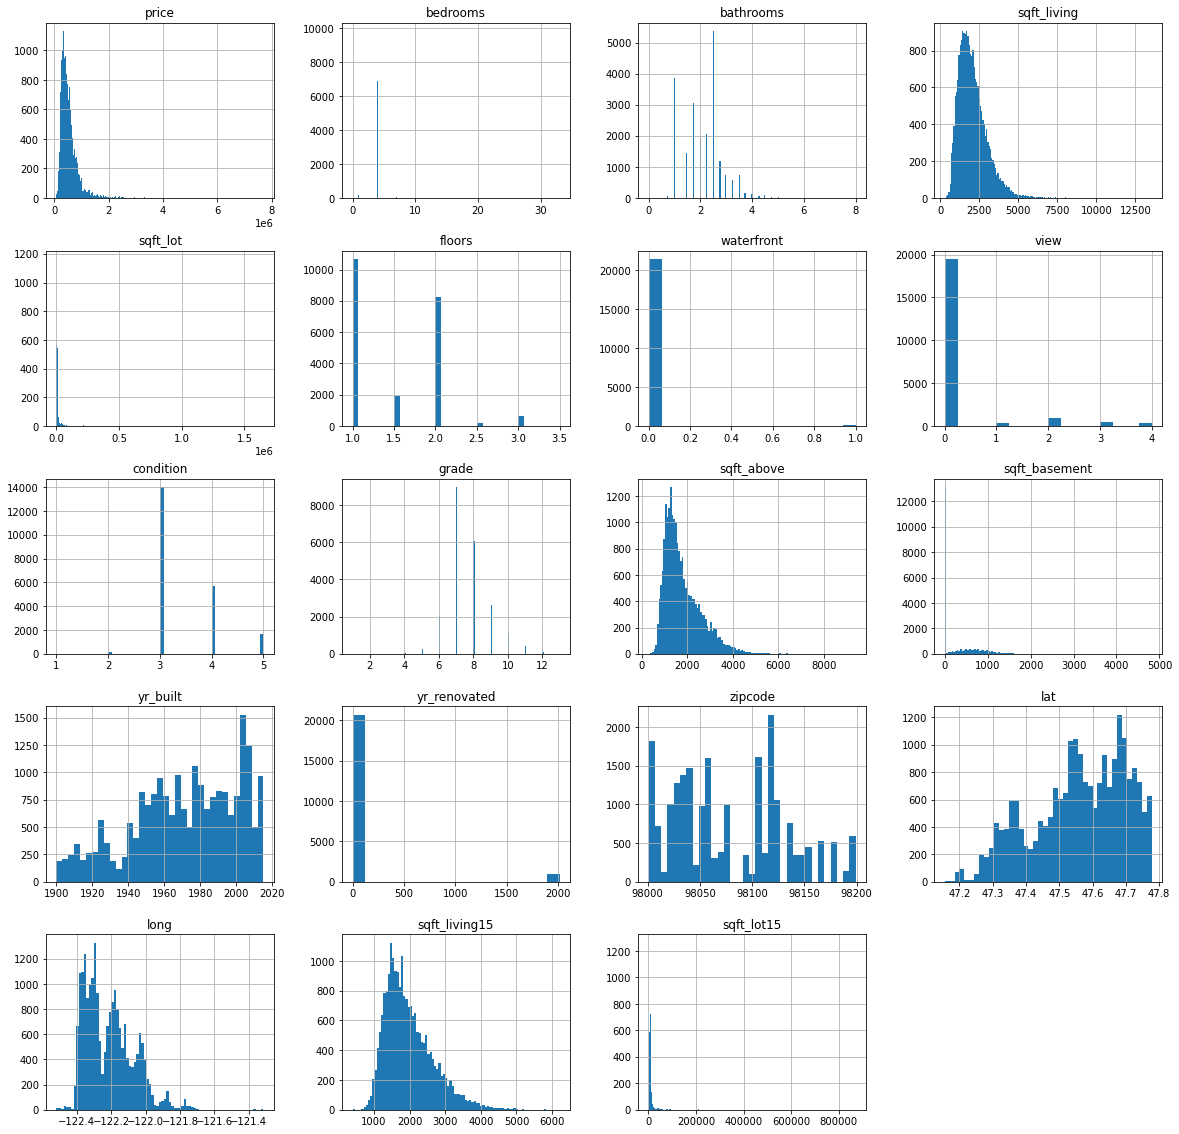

In [62]:
# Vérifier les valeurs extrêmes ou non pertinentes
# histogramme de chaque caractéristique numérique 
df.hist(bins = "auto", figsize = (20,20));

In [63]:
# la sortie présentée ci-dessus nous aide principalement à comprendre la forme, 
# l'asymétrie et la modalité de chaque distribution. Plusieurs  features telles que le price ,
# yr_built et sqft_living sont asymétriques et unimodales. 
# Ces distributions mettent également en lumière les variables qui pourraient être considérées comme 
# catégorielles et celles qui sont définitivement continues (barres discrètes vs formes semi-lisses).

C:\Users\TOUREA~1\AppData\Local\Temp/ipykernel_14008/761796291.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  not_object = df.select_dtypes(exclude = np.object).columns


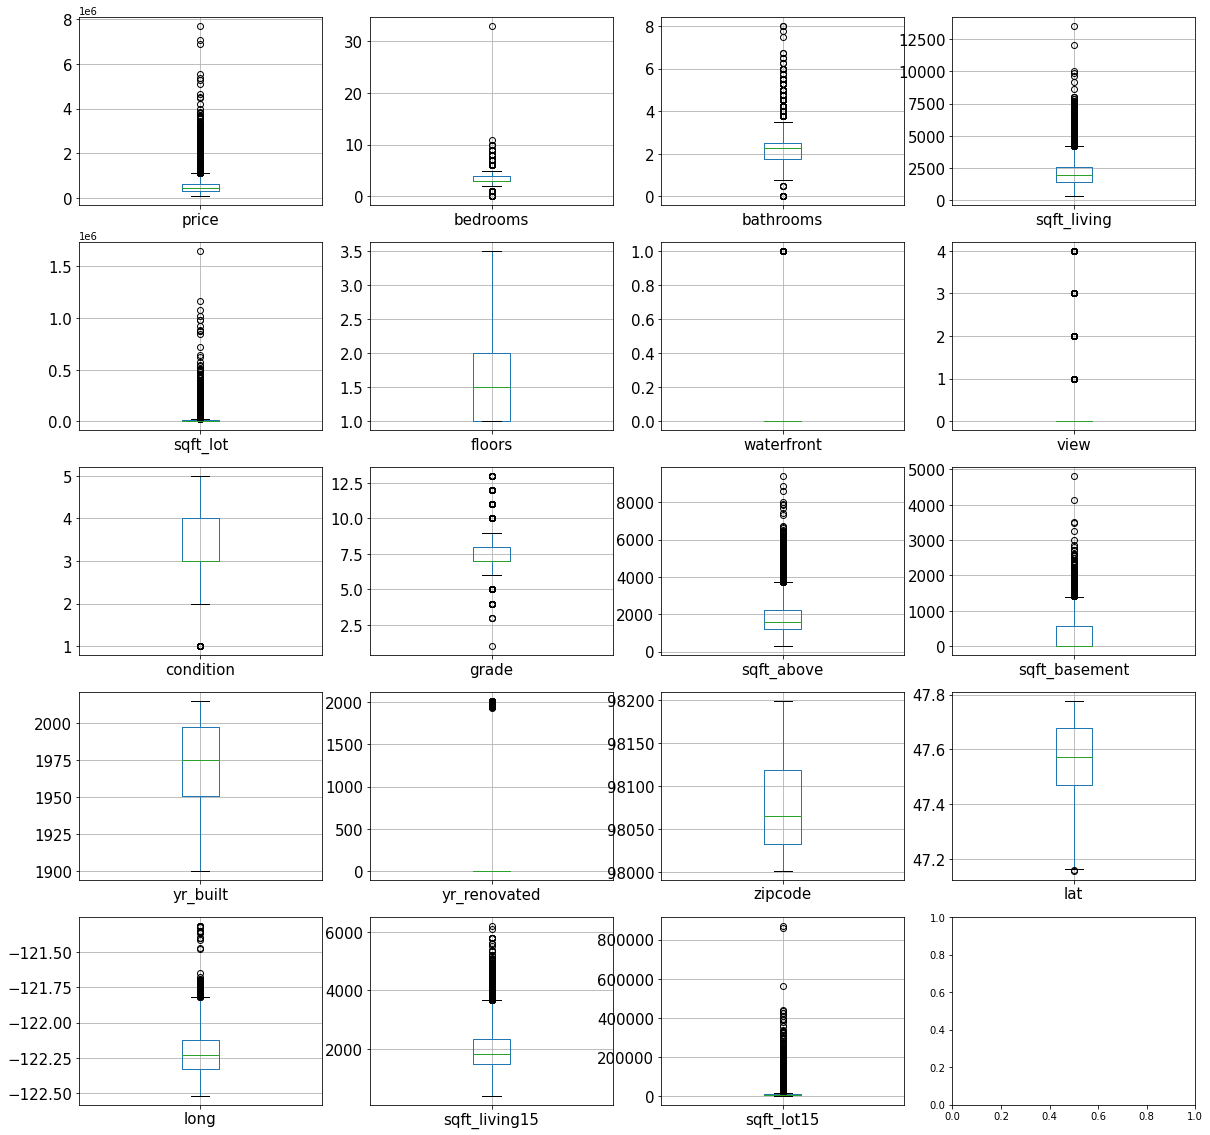

In [64]:
# visualisation uniquement des boîtes à moustaches de variables non-chaînes
not_object = df.select_dtypes(exclude = np.object).columns
fig, axes = plt.subplots(nrows = 5, ncols = 4, figsize = (20,20))
# counter
index = 0
for row in range(len(axes)):
    for col in range(len(axes[row])):
        if index == len(not_object):
            break
        ax = axes[row][col]
        var = df[[not_object[index]]]
        var.boxplot(fontsize = 15, ax = ax)
        index += 1

In [65]:
# La plupart des boîtes à moustaches affichées ci-dessus montrent des valeurs aberrantes possibles. 
# certaines boîtes à moustaches le font avec précision (il y a une maison avec 33 chambres), 
# d'autres boîtes à moustaches rapportent des « valeurs aberrantes » qui ont un sens plutôt logique 
# (maisons rénovées en 2000 ou une maison ayant une cote d'état de 1).

In [66]:
# La vérification des valeurs non pertinentes est quelque peu compliquée. 
# Ce que nous allons faire, c'est d'abord vérifier si toutes les colonnes "numériques" 
# (entiers ou flottants) peuvent être converties en un type de données int. 
# Si toutes ces colonnes ont vraiment des valeurs numériques, il ne devrait pas y avoir d'erreur:

# liste contenant toutes les valeurs non pertinentes 
incorrect_nums = []
# not_object est la liste de toutes les colonnes numériques 
for col in not_object:
    for val in df[col].dropna():
        try:
            int(val)
        except:
            # append val that could't être contraint à int 
            incorrect_nums.append(val)
print("Il y a", len(incorrect_nums), "des valeurs erronées dans nos colonnes numériques.")

Il y a 0 des valeurs erronées dans nos colonnes numériques.


In [67]:
# C'est une indication forte qu'il n'existe pas de valeurs erronées dans nos colonnes numériques.

In [68]:
# La vérification des colonnes non numériques est plus facile car il n'y en a que 2 ( date et sqft_basement ). 
# Nous allons essayer de contraindre la date d'une chaîne à un objet datetime et sqft_basement dans un flottant 
# (leurs types de données appropriés):

incorrect_dates = []
for val in df.date:
    try:
        pd.to_datetime(val)
    except:
        incorrect_dates.append(val)
incorrect_sqfts = []
for val in df.sqft_basement:
    try:
        float(val)
    except:
        incorrect_sqfts.append(val)
print("Il y a/y a", len(incorrect_dates), "valeurs erronées dans la colonne de date.") 
print("Il y a/y a", len(incorrect_sqfts), "valeur(s) erronée(s) dans la colonne sqft_basement." )

Il y a/y a 0 valeurs erronées dans la colonne de date.
Il y a/y a 0 valeur(s) erronée(s) dans la colonne sqft_basement.


In [69]:
# il n'existe pas de valeur non pertinente dans les colonnes : date - sqft_basement

In [70]:
# Correction des valeurs extrêmes et non pertinentes

# supprimer les enregistrements qui dépassent les valeurs "extrêmes": 
#
df = df[df.price < 5000000]
#
df = df[df.bedrooms < 6]
df = df[df.bathrooms < 4]
# 
df = df[df.sqft_living < 10000]
df = df[df.sqft_lot < 800000]
df = df[df.sqft_above < 7000]
# 
df = df[df.long < -121.8]
#
df = df[df.sqft_living15 < 5000]
df = df[df.sqft_lot15 < 300000]
pct_diff = ((21597 - df.shape[0])/21597)*100
print("Nous avons maintenant", df.shape[0], "lignes ({}% de moins qu'au début)".format(round(pct_diff, 2)))

Nous avons maintenant 20682 lignes (4.24% de moins qu'au début)


In [71]:
# afficher à nouveau les types de données par colonne 
df.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [72]:
# Alors que certaines ont du sens (par exemple, prix = flotteur, chambres = int, date object.), 
# il existe d'autres colonnes qui doivent être converties en un type de données différent. 
# Nous allons le faire dans cette étape :

# conversion des colonnes en type de données approprié 
df.date = pd.to_datetime(df.date) 
# J'ai décidé d'utiliser la fonction ceil pour les variables discrètes par nature mais flottantes 
df.bathrooms = np.ceil(df.bathrooms).astype(int) 
df.floors = np.ceil(df.floors).astype(int) 
df.waterfront = df.waterfront.astype(int) 
df.view = df.view.astype(int) 
# impossible de convertir la chaîne flottante en int directement 
df .sqft_basement = df.sqft_basement.astype(float).astype(int) 
df.yr_renovated = df.yr_renovated.astype(int)
df.dtypes

date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms                 int32
sqft_living               int64
sqft_lot                  int64
floors                    int32
waterfront                int32
view                      int32
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int32
yr_built                  int64
yr_renovated              int32
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [73]:
# Afin d'améliorer ultérieurement les performances de notre modèle, 
# il est généralement judicieux de transformer ces variables pour qu'elles 
# ressemblent à des distributions normales. 
# Une façon de faire est de transformer la variable en log :

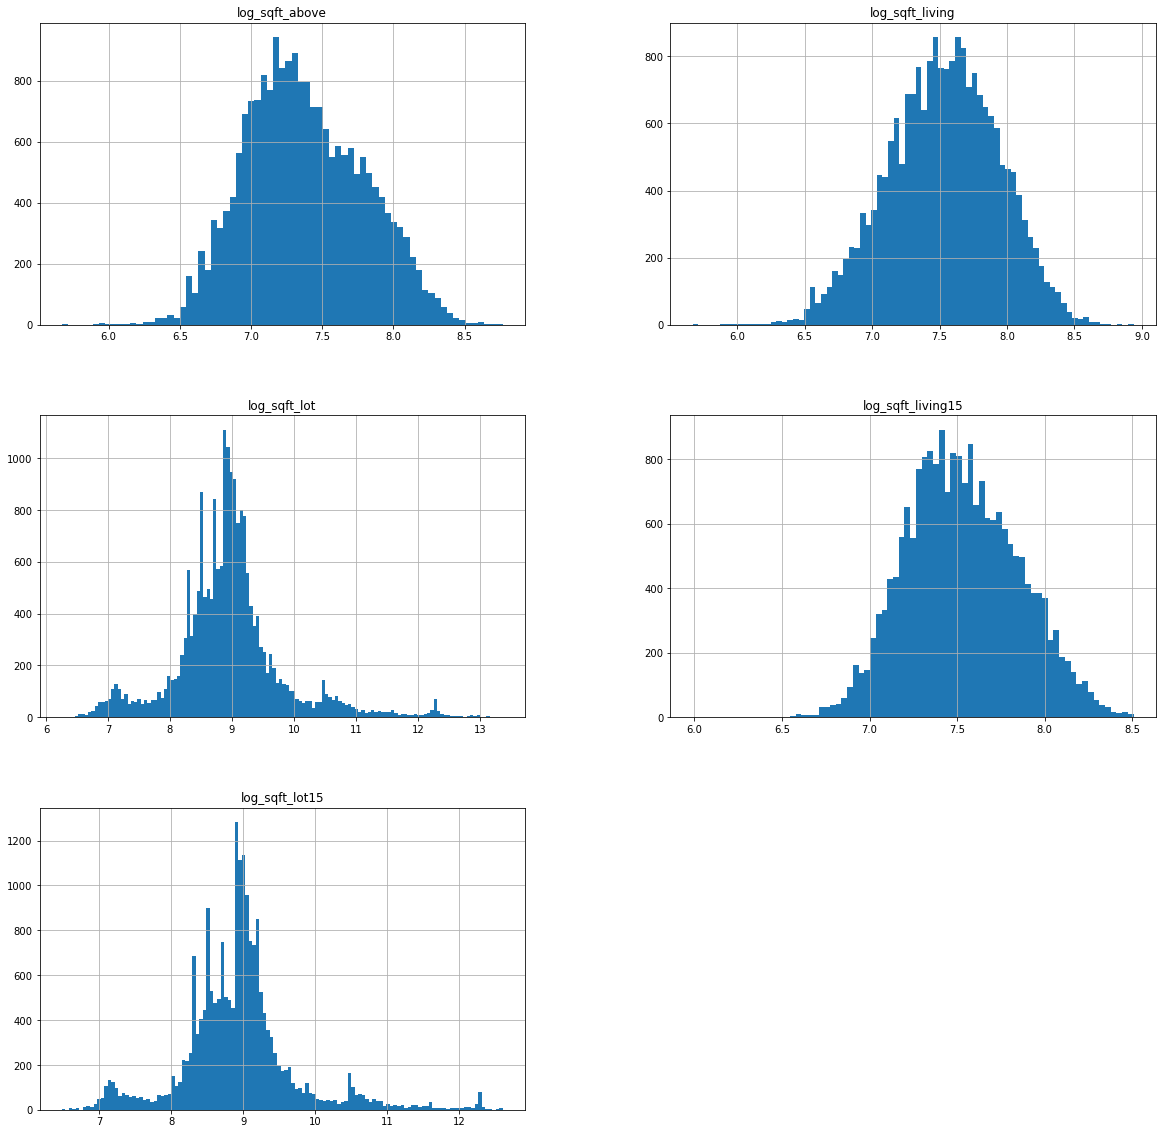

In [74]:
log_vars = ["log_sqft_above", "log_sqft_living", "log_sqft_lot", 
            "log_sqft_living15", "log_sqft_lot15"]
# variables choisies de transformation logarithmique 
df[log_vars] = np.log(df[["sqft_above", "sqft_living", "sqft_lot", 
                          "sqft_living15", "sqft_lot15"]])
# suppression des variables non transformées 
df.drop(["sqft_above", "sqft_living", "sqft_lot", "sqft_living15",   
         "sqft_lot15"], axis = 1, inplace = True)
df[log_vars].hist(bins = "auto", figsize = (20,20));

In [75]:
# Comme le montre la sortie ci-dessus, 
# les distributions de nos variables prédictives ont maintenant changé 
# pour ressembler davantage à une distribution normale (symétrique, unimodale, "en forme de cloche"). 
# cela améliorera les performances de notre modèle plus tard.
# Nous avons maintenant nettoyé les données de toutes les valeurs manquantes, vérifié les doublons, 
# géré les valeurs extrêmes (valeurs aberrantes) et converti chaque colonne en son type de données correct.

In [76]:
# 2. Rédigez un paragraphe en sélectionnant les features les plus importantes (sélection des fonctionnalités). 

In [77]:
#verifier la correlation
df.corr()['price'].sort_values()

zipcode             -0.042706
long                 0.034384
yr_built             0.036043
condition            0.052399
log_sqft_lot15       0.125715
yr_renovated         0.130743
log_sqft_lot         0.134659
waterfront           0.238580
floors               0.250613
sqft_basement        0.285947
bedrooms             0.290423
lat                  0.344329
view                 0.380261
bathrooms            0.437134
log_sqft_above       0.520165
log_sqft_living15    0.547592
log_sqft_living      0.598238
grade                0.656273
price                1.000000
Name: price, dtype: float64

In [78]:
#'price','bedrooms','bathrooms','log_sqft_living','log_sqft_lot','floors','waterfront','condition','grade','yr_built','yr_renovated'
# nous selectionnerons les features suivantes: 
# car elles ont des correlations >= 0


In [79]:
feature = df.drop(["date","zipcode", "long", "sqft_basement", "lat", "view"], axis=1)

In [106]:
feature.head()

,price,bedrooms,bathrooms,floors,waterfront,condition,grade,yr_built,yr_renovated,log_sqft_above,log_sqft_living,log_sqft_living15,log_sqft_lot15
0,221900.0,3,1,1,0,3,7,1955,0,7.073270,7.073270,7.200425,8.639411
1,538000.0,3,3,2,0,3,7,1951,1991,7.682482,7.851661,7.432484,8.941022
2,180000.0,2,1,1,0,3,6,1933,0,6.646391,6.646391,7.908387,8.994917
3,604000.0,4,3,1,0,5,7,1965,0,6.956545,7.580700,7.215240,8.517193
4,510000.0,3,2,1,0,3,8,1987,0,7.426549,7.426549,7.495542,8.923058


In [81]:
# Data visualisation

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

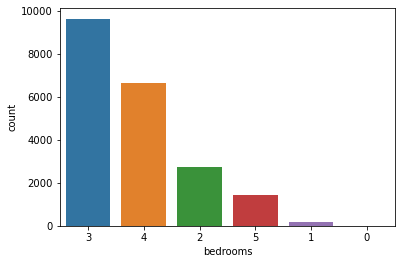

In [85]:
sns.countplot(feature.bedrooms,order=feature['bedrooms'].value_counts().index)

No handles with labels found to put in legend.


<AxesSubplot:title={'center':'prix des maisons par surface habitable'}, xlabel='log_sqft_living', ylabel='price'>

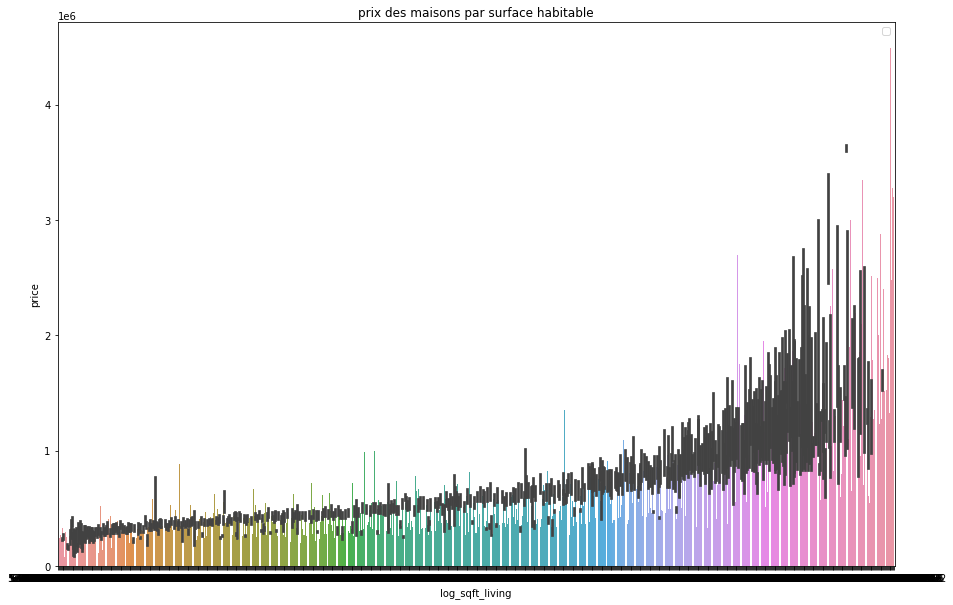

In [86]:
fig,axis=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
plt.title('prix des maisons par surface habitable')
plt.xlabel('log_sqft_living')
plt.ylabel('prix des maisons')
plt.legend()
sns.barplot(x='log_sqft_living', y='price', data=feature)

No handles with labels found to put in legend.


<AxesSubplot:title={'center':'prix des maisons par pieds carre'}, xlabel='log_sqft_above', ylabel='price'>

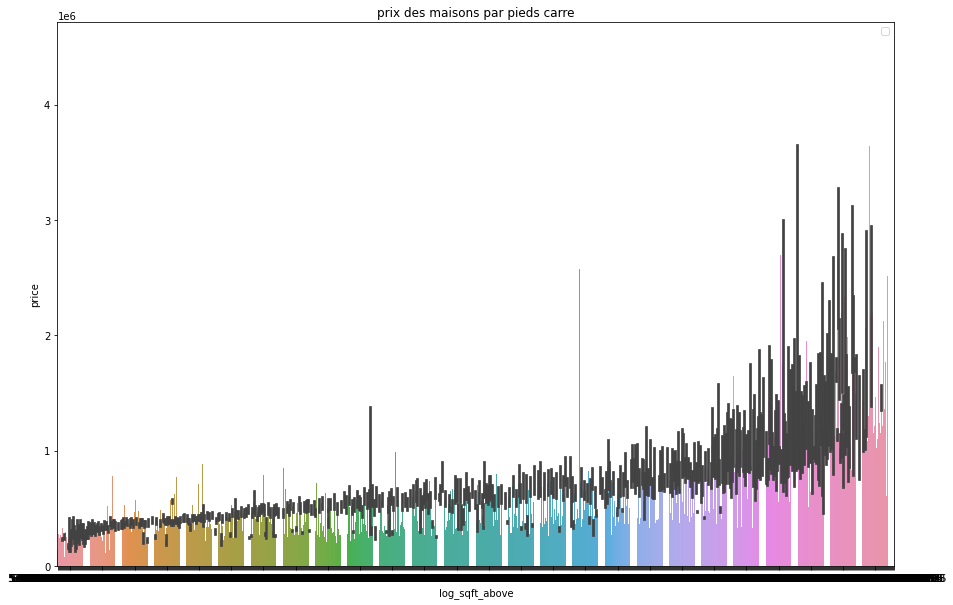

In [87]:
fig,axis=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
plt.title('prix des maisons par pieds carre')
plt.xlabel('log_sqft_above')
plt.ylabel('prix des maisons')
plt.legend()
sns.barplot(x='log_sqft_above', y='price', data=feature)

(array([   32.,  2016., 10037.,  8103.,   494.]),
 array([5.66988092, 6.32361107, 6.97734121, 7.63107136, 8.2848015 ,
        8.93853165]),
 <BarContainer object of 5 artists>)

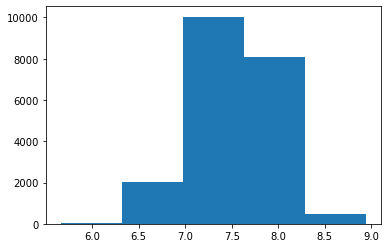

In [88]:
plt.hist('log_sqft_living', data=feature,bins=5)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_sqft_living', ylabel='Density'>

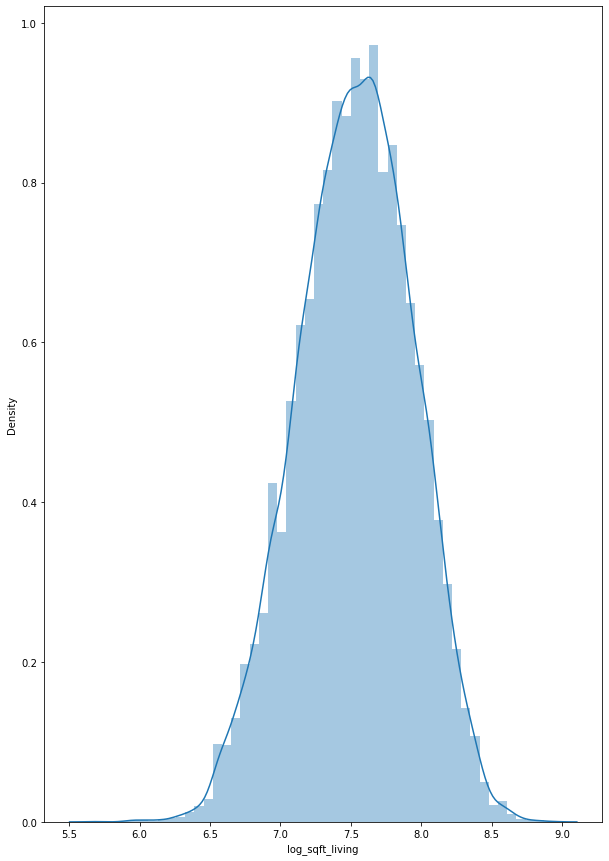

In [92]:
fig,axis=plt.subplots(nrows=1,ncols=1,figsize=(10,15))
sns.distplot(feature['log_sqft_living'],hist=True,kde=True,rug=False,label='log_sqft_living', norm_hist=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_sqft_above', ylabel='Density'>

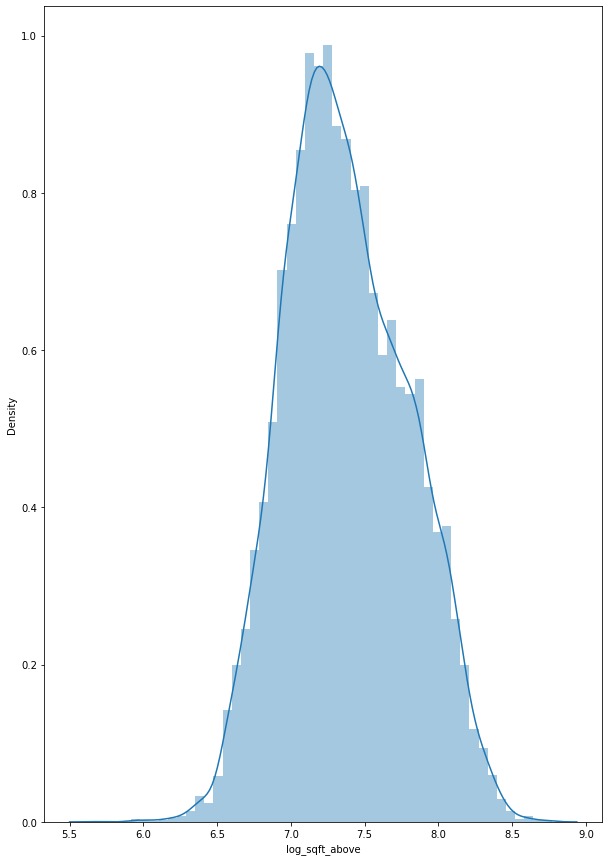

In [93]:
fig,axis=plt.subplots(nrows=1,ncols=1,figsize=(10,15))
sns.distplot(feature['log_sqft_above'],hist=True,kde=True,rug=False,label='log_sqft_above', norm_hist=True)

In [95]:
print('Mean', round(feature['log_sqft_living'].mean(),2))
print('Median', feature['log_sqft_living'].median())
print('Mode', feature['log_sqft_living'].mode()[0])

Mean 7.53
Median 7.539027055823995
Mode 7.170119543449628


In [96]:
def plot_correlation_map(kc):
    corr = kc.corr()
    s,ax = plt.subplots(figsize=(20,15))
    cmap = sns.diverging_palette(220,10,as_cmap=True)
    s = sns.heatmap(
        corr,
        cmap=cmap,
        square=True,
        cbar_kws={'cmap':.9},
        ax=ax,
        annot=True,
        annot_kws={'fontsize':12}
        )

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:312: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = ax.figure.colorbar(mesh, cax, ax, **self.cbar_kws)


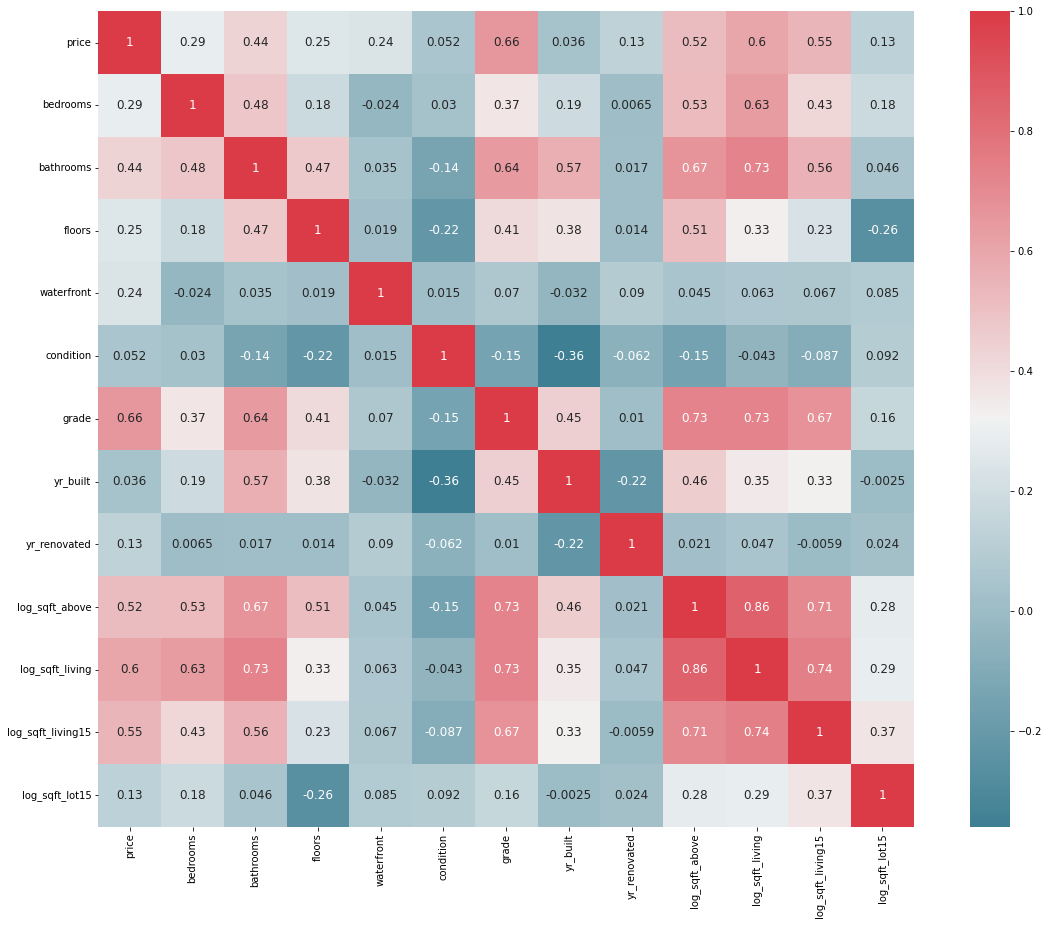

In [97]:
plot_correlation_map(feature)

In [ ]:
# Regression Lineaire Simple

In [ ]:
# 3. Divisez votre ensemble de données en un ensemble d'apprentissage et un ensemble de test.
# 4. Appliquez la régression linéaire à votre ensemble d'entraînement. 
# 5. Tracez la régression linéaire. 
# 5. Mesurez les performances de la régression linéaire à l'aide de l'ensemble de test. 

In [107]:
kc1 = ['price','bedrooms','bathrooms','log_sqft_living','floors','waterfront','condition','grade','yr_built','yr_renovated']
kc1 = feature[kc1]
kc1

,price,bedrooms,bathrooms,log_sqft_living,floors,waterfront,condition,grade,yr_built,yr_renovated
0,221900.0,3,1,7.073270,1,0,3,7,1955,0
1,538000.0,3,3,7.851661,2,0,3,7,1951,1991
2,180000.0,2,1,6.646391,1,0,3,6,1933,0
3,604000.0,4,3,7.580700,1,0,5,7,1965,0
4,510000.0,3,2,7.426549,1,0,3,8,1987,0
...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,3,7.333023,3,0,3,8,2009,0
21609,400000.0,4,3,7.745003,2,0,3,8,2014,0
21610,402101.0,2,1,6.927558,2,0,3,7,2009,0
21611,400000.0,3,3,7.377759,2,0,3,8,2004,0


In [114]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

In [115]:
train_data,test_data = train_test_split(feature,train_size=0.8,random_state=3)
x_train = np.array(train_data['log_sqft_living']).reshape(-1,1)
y_train = np.array(train_data['price']).reshape(-1,1)

In [116]:
x_test = np.array(test_data['log_sqft_living']).reshape(-1,1)
y_test = np.array(test_data['price']).reshape(-1,1)

In [117]:
print(x_test.shape)
print(y_test.shape)

(4137, 1)
(4137, 1)


In [118]:
print(x_train.shape)
print(y_train.shape)

(16545, 1)
(16545, 1)


In [119]:
model = linear_model.LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [120]:
pred = model.predict(x_test)

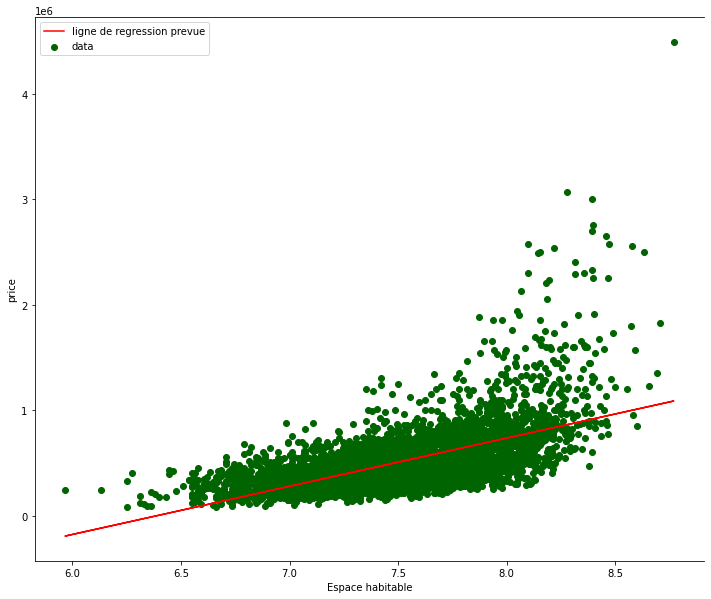

In [121]:
_,ax = plt.subplots(figsize=(12,10))
plt.scatter(x_test,y_test, color='darkgreen',label='data')
plt.plot(x_test,model.predict(x_test),color='red',label='ligne de regression prevue')
plt.xlabel('Espace habitable')
plt.ylabel('price')
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [123]:
print('Model train score', model.score(x_train,y_train))
print('Model test score', model.score(x_test,y_test))

Model train score 0.35853862226053146
Model test score 0.3552274030470082


In [ ]:
# 6. Appliquez la régression multilinéaire et comparez-la au modèle linéaire. 

In [125]:
features1 = ['bedrooms','grade','log_sqft_living','log_sqft_above']
model = linear_model.LinearRegression()
model.fit(train_data[features1],train_data['price'])
ypred = model.predict(test_data[features1])

In [126]:
print('Model train score', model.score(train_data[features1],y_train))
print('Model test score', model.score(test_data[features1],y_test))

Model train score 0.4743410821067804
Model test score 0.46196973531798713


In [ ]:
# Regression Polynomial

In [128]:
from sklearn.preprocessing import PolynomialFeatures

In [129]:
polyfeat = PolynomialFeatures(degree=2)
xtrain_poly = polyfeat.fit_transform(train_data[features1])
xtest_poly = polyfeat.fit_transform(test_data[features1])

poly = linear_model.LinearRegression()
poly.fit(xtrain_poly,train_data['price'])
polypred = poly.predict(xtest_poly)

In [ ]:
print('Model train score', poly.score(xtrain_poly,y_train))
print('Model test score', poly.score(xtest_poly,y_test))

In [ ]:
# La regression Polynomial donne un meilleure score sur le test par rapport a la regression multilineaire et la regression lineaire simple